In [1]:
#importing the dataset
import pandas as pd
df_spend=pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/Wholesale%20customers%20data.csv")
df_spend

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
#Lets chcek wheher there are null values or not
df_spend.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
#as mentioned that we can drop features "channel" and "region"
df_spend.drop(columns=["Channel","Region"],inplace=True)

In [4]:
#displaying the data
df_spend

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [5]:
#Lets chcek the correlation matrix
df_spend.corr()
#We cans see some high correlations between grocerry and milk,milk and detergents_paper,Grocerry and detergents_paper

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
#lets describe the above Dataset
df_spend.describe()
#there seems to be sigificant difference between mean and median ,so there are outliers
#Also outliers can be wrong value or really high spending
#If we remove outliers we may remove customer group which are making spending most

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#Let's make columns for each type of product which categorize spending as very low,low,medium,high
#for this we will use percentile obtained from above matrix
df_spend["Fresh_spend"]=pd.cut(df_spend["Fresh"],bins=[3.0,3127.750,8504.0,16933.750,112151.0],labels=["very_low","low","medium","high"])
df_spend["Milk_spend"]=pd.cut(df_spend["Milk"],bins=[55.0,1533.0,3627.0,7190.25,73498.0],labels=["very_low","low","medium","high"])
df_spend["Grocerry_spend"]=pd.cut(df_spend["Grocery"],bins=[3.0,2153.0,4755.5,10655.75,92780.0],labels=["very_low","low","medium","high"])
df_spend["Frozen_spend"]=pd.cut(df_spend["Frozen"],bins=[25.0,742.25,1526.0,3554.25,60869.0],labels=["very_low","low","medium","high"])
df_spend["Detergent_spend"]=pd.cut(df_spend["Detergents_Paper"],bins=[3.0,256.75,816.5,3922.0,40827.0],labels=["very_low","low","medium","high"])
df_spend["Delicassen_spend"]=pd.cut(df_spend["Delicassen"],bins=[3.0,408.25,965.5,1820.25,47943.0],labels=["very_low","low","medium","high"])

In [8]:
#displaying the data wth new columns
df_spend

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_spend,Milk_spend,Grocerry_spend,Frozen_spend,Detergent_spend,Delicassen_spend
0,12669,9656,7561,214,2674,1338,medium,high,medium,very_low,medium,medium
1,7057,9810,9568,1762,3293,1776,low,high,medium,medium,medium,medium
2,6353,8808,7684,2405,3516,7844,low,high,medium,medium,medium,high
3,13265,1196,4221,6404,507,1788,medium,very_low,low,high,low,medium
4,22615,5410,7198,3915,1777,5185,high,medium,medium,high,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,high,high,high,high,very_low,high
436,39228,1431,764,4510,93,2346,high,very_low,very_low,high,very_low,high
437,14531,15488,30243,437,14841,1867,medium,high,high,very_low,high,high
438,10290,1981,2232,1038,168,2125,medium,low,low,low,very_low,high


In [9]:
#The new columns created will help us in segmenting  the dataset based on spendings
#lets display the data with high spendings on each of the product categories
df_spend.loc[(df_spend["Fresh_spend"]=="high")&(df_spend["Milk_spend"]=="high")&(df_spend["Grocerry_spend"]=="high")&(df_spend["Frozen_spend"]=="high")&(df_spend["Detergent_spend"]=="high")&(df_spend["Delicassen_spend"]=="high"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
47,44466,54259,55571,7782,24171,6465
181,112151,29627,18148,16745,4948,8550


In [10]:
#lets display the data with medium spendings on each of the product categories
df_spend.loc[(df_spend["Fresh_spend"]=="medium")&(df_spend["Milk_spend"]=="medium")&(df_spend["Grocerry_spend"]=="medium")&(df_spend["Frozen_spend"]=="medium")&(df_spend["Detergent_spend"]=="medium")&(df_spend["Delicassen_spend"]=="medium"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]
#There are no customer group who does medium spending on all products simultaneously

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [11]:
#lets display the data with low spendings on each of the product categories
df_spend.loc[(df_spend["Fresh_spend"]=="low")&(df_spend["Milk_spend"]=="low")&(df_spend["Grocerry_spend"]=="low")&(df_spend["Frozen_spend"]=="low")&(df_spend["Detergent_spend"]=="low")&(df_spend["Delicassen_spend"]=="low"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [12]:
#lets display the data with very_low spendings on each of the product categories
df_spend.loc[(df_spend["Fresh_spend"]=="very_low")&(df_spend["Milk_spend"]=="very_low")&(df_spend["Grocerry_spend"]=="very_low")&(df_spend["Frozen_spend"]=="very_low")&(df_spend["Detergent_spend"]=="very_low")&(df_spend["Delicassen_spend"]=="very_low"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
131,2101,589,314,346,70,310
355,190,727,2012,245,184,127


From above segmentation we were not able to get data in each groups,Therefore lets try to chcek with 2 groups above medium and below 50 percentile of respective columns

In [13]:
df_spend.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
#Less than equal to 50 percentile
df_spend.loc[(df_spend["Fresh"]<=8504.0)&(df_spend["Milk"]<=3627.0)&(df_spend["Grocery"]<=4755.5)&(df_spend["Frozen"]<=1526.0)&(df_spend["Detergents_Paper"]<=816.5)&(df_spend["Delicassen"]<=965.5),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
34,1502,1979,2262,425,483,395
69,8352,2820,1293,779,656,144
80,7005,829,3009,430,610,529
97,403,254,610,774,54,63
98,503,112,778,895,56,132
131,2101,589,314,346,70,310
134,7388,1882,2174,720,47,537
135,6300,1289,2591,1170,199,326
146,7769,1936,2177,926,73,520
154,622,55,137,75,7,8


In [15]:
#greater than 50 percentile
df_spend.loc[(df_spend["Fresh"]>8504.0)&(df_spend["Milk"]>3627.0)&(df_spend["Grocery"]>4755.5)&(df_spend["Frozen"]>1526.0)&(df_spend["Detergents_Paper"]>816.5)&(df_spend["Delicassen"]>965.5),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
4,22615,5410,7198,3915,1777,5185
18,18601,6327,10099,2205,2767,3181
23,26373,36423,22019,5154,4337,16523
24,22647,9776,13792,2915,4482,5778
36,29955,4362,5428,1729,862,4626
40,24025,4332,4757,9510,1145,5864
47,44466,54259,55571,7782,24171,6465
61,35942,38369,59598,3254,26701,2017
63,9396,11601,15775,2896,7677,1295
87,43265,5025,8117,6312,1579,14351


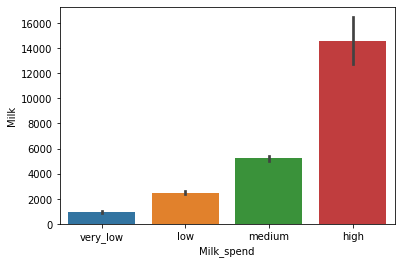

In [16]:
#Lets chcek the average spendings in milk each quantile graphically
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Milk_spend",y="Milk",data=df_spend)
plt.show()

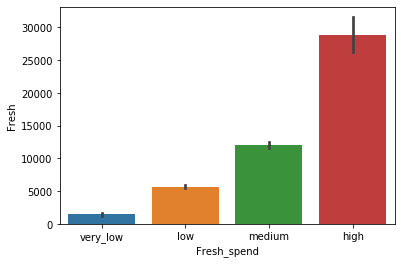

In [17]:
#lets chcek this for "Fresh" product
sns.barplot(x="Fresh_spend",y="Fresh",data=df_spend)
plt.show()

All the above graphs of average spending based on low to high wil be of same trend,important here is to analyze the increase

In [18]:
#lets chcek the people who are sepnding very low on first three products
df_spend.loc[(df_spend["Fresh_spend"]=="very_low")&(df_spend["Milk_spend"]=="very_low")&(df_spend["Grocerry_spend"]=="very_low"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
97,403,254,610,774,54,63
98,503,112,778,895,56,132
131,2101,589,314,346,70,310
186,3009,521,854,3470,949,727
228,1869,577,572,950,4762,203
299,444,879,2060,264,290,259
327,542,899,1664,414,88,522
344,3043,1172,1763,2234,217,379
352,608,1106,1533,830,90,195
355,190,727,2012,245,184,127


In [19]:
#lets chcek the people who are sepnding very low on first three products
df_spend.loc[(df_spend["Fresh_spend"]=="low")&(df_spend["Milk_spend"]=="low")&(df_spend["Grocerry_spend"]=="low"),["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
134,7388,1882,2174,720,47,537
146,7769,1936,2177,926,73,520
252,6623,1860,4740,7683,205,1693
280,3366,2884,2431,977,167,1104
291,6022,3354,3261,2507,212,686
410,6633,2096,4563,1389,1860,1892
414,5969,1990,3417,5679,1135,290


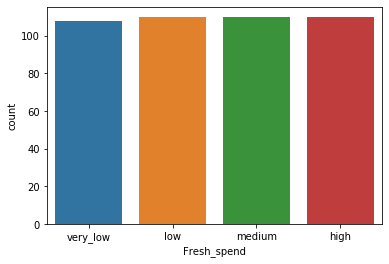

In [20]:
#Lets graphically chcek the count  of people who are spending very_low,low_medium and high on each actegory of product
sns.countplot(x="Fresh_spend",data=df_spend)
plt.show()

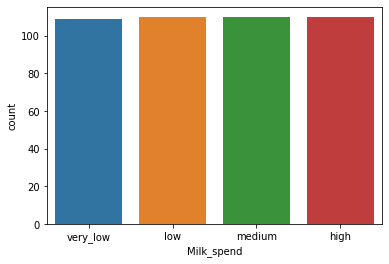

In [21]:
#lets chcek for milk
sns.countplot(x="Milk_spend",data=df_spend)
plt.show()

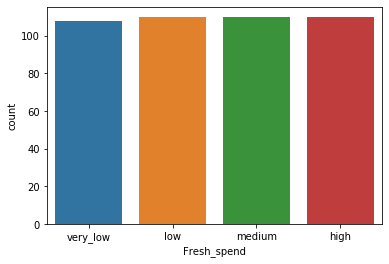

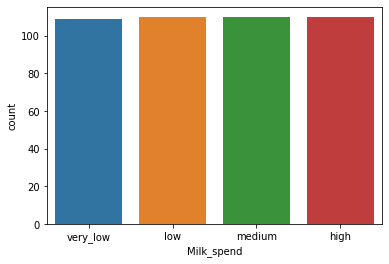

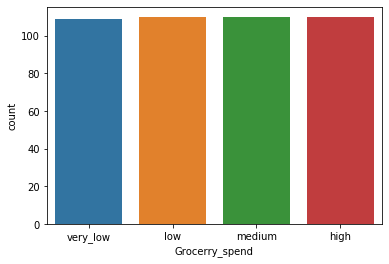

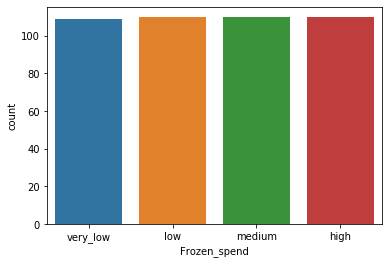

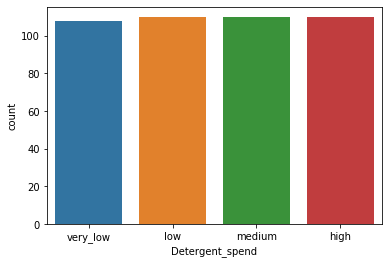

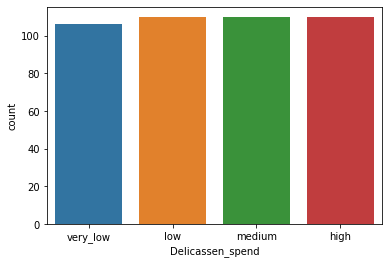

In [22]:
#Lets plot the graph of countplot using for loop
df_spend.columns
cols=['Fresh_spend', 'Milk_spend', 'Grocerry_spend', 'Frozen_spend',"Detergent_spend","Delicassen_spend"]
for col in cols:
    sns.countplot(x=col,data=df_spend)
    plt.show()
    print()
    print()
#From below we come to know there are equal instances of each type of spendings per caegory of product

Above method of making new columns is called binning ,now using that one column or combination of columns we can identify customer groups and provide them with the plans such that those kind of customer increase their spendings

In [23]:
#input
df_x=df_spend[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

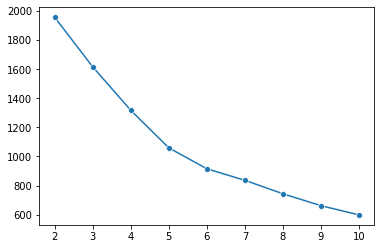

In [25]:
#Now we will use unsupervised K means clustering algorithm to find the clusters
from sklearn.cluster import KMeans
inertia_list=list()
for cluster in range(2,11):
    km=KMeans(n_clusters=cluster)
    km.fit(x)
    inertia_list.append(km.inertia_)
sns.lineplot(x=range(2,11),y=inertia_list,marker='o')
plt.show()
#We can see below change is consant between 6 to 9 ,so lets choose number of clusters as 8

In [26]:
#so making the final model
km=KMeans(n_clusters=8)
km.fit(x)
y_pred=km.predict(x)

In [27]:
y_pred=pd.DataFrame(y_pred,columns=["target"])
df_final=pd.concat([df_x,y_pred],axis=1)
df_final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,target
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,7
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,7
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,5


In [28]:
#Lets check the value counts
df_final["target"].value_counts()

5    208
0    106
3     41
7     38
1     37
4      7
6      2
2      1
Name: target, dtype: int64

In [29]:
#Lets chcek silhouette_score
from sklearn.metrics import silhouette_score
for cluster in range(2,11):
    km=KMeans(n_clusters=cluster)
    km.fit(x)
    y_pred=km.predict(x)
    print("Average silhouette_score for cluster: {} is: {}".format(cluster,silhouette_score(x,y_pred)))

Average silhouette_score for cluster: 2 is: 0.6400082472471419
Average silhouette_score for cluster: 3 is: 0.40139631039575313
Average silhouette_score for cluster: 4 is: 0.40178665665556396
Average silhouette_score for cluster: 5 is: 0.3690403826812808
Average silhouette_score for cluster: 6 is: 0.37261940878212635
Average silhouette_score for cluster: 7 is: 0.30439178904231573
Average silhouette_score for cluster: 8 is: 0.31728407032253325
Average silhouette_score for cluster: 9 is: 0.3321637165637532
Average silhouette_score for cluster: 10 is: 0.31370242383778796
